##Implement DPLL algorithm

@ --> union


In [ ]:
import copy
import pdb
def Truth(clause):
    #pdb.set_trace()
    for keys in clause:
        if(clause[keys]==-1):
            return False
    return True

def someFalse(clause):
    for keys in clause:
        if(clause[keys]==0):
            return True
    return False


def fixClauseValue(clause,copy_symbols,symbols):
    for key in clause:
        for i in range(len(key)):
            if(key[i] in copy_symbols):
                if(symbols[key[i]]==1 or symbols[key[i]]==0):
                    clause[key]=1
                    copy_symbols.remove(key[i])
    return clause,copy_symbols,symbols




def findPureSymbol(clause,copy_symbols,symbols):
    #pdb.set_trace()
    for key in clause:
        for i in range(len(key)):
            if(key[i] in copy_symbols):
                if(symbols[key[i]]==-1):
                    if(key[i-1]=="~"):
                        symbols[key[i]]=0
                    else:
                        symbols[key[i]]=1
                elif(symbols[key[i]]==1 and key[i-1]=='~'):
                    symbols[key[i]]=2
                elif(symbols[key[i]]==0 and key[i-1]!="~"):
                    symbols[key[i]]=2
    return fixClauseValue(clause,copy_symbols,symbols)





def findUnitClause(clause,copy_symbols,symbols):
     #pdb.set_trace()
     for key in clause:
         if(len(key)<=2):
            clause[key]=1

            if(len(key)==1):
                symbols[key[0]]=1
                copy_symbols.remove(key[0])
                tempClause,clause=MakeKeyClauseTrue(clause, symbols,copy_symbols,key,1)
            else:
                symbols[key[1]]=0
                copy_symbols.remove(key[1])
                tempClause,clause=MakeKeyClauseTrue(clause, symbols,copy_symbols,key,0)
     return clause,copy_symbols,symbols

def MakeKeyClauseTrue(clause, symbols,copy_symbols,key,num):
    tempClause=[]
    for keys in clause:
        if(clause[keys]!=1 and key in keys):
            for i in range(len(keys)):
                if(keys[i]==key and num==1 and keys[i-1]!="~"):
                    clause[keys]=1
                    tempClause.append(keys)
                elif((keys[i]==key and num==0 and keys[i-1]=="~")):
                    clause[keys]=1
                    tempClause.append(keys)

    return tempClause,clause





def DPLL(clause, symbols,copy_symbols,temp):
    #pdb.set_trace()
    if Truth(clause):
        return True,symbols,copy_symbols
    if someFalse(clause):
        return False,symbols,copy_symbols

    if len(copy_symbols) == 0:
        return False,symbols,copy_symbols
    if temp==0:
      clause,copy_symbols,symbols=findUnitClause(clause, copy_symbols,symbols)
      clause,copy_symbols,symbols=findPureSymbol(clause, copy_symbols,symbols)

    if len(copy_symbols) == 0:
        return True,symbols,copy_symbols

    key=copy_symbols.pop()
    symbols[key]=1
    clause_copy=copy.deepcopy(clause)
    tempClause,clause=MakeKeyClauseTrue(clause, symbols,copy_symbols,key,1)
    result_true,symbols,copy_symbols = DPLL(clause, symbols,copy_symbols,1)
    if result_true:
        return True,symbols,copy_symbols
    symbols[key]=0
    clause=clause_copy
    tempClause,clause=MakeKeyClauseTrue(clause, symbols,copy_symbols,key,0)
    result_false,symbols,copy_symbols = DPLL(clause, symbols,copy_symbols,1)
    return result_false,symbols,copy_symbols

clause = {"p@q":-1, "p@~q":-1, "~q@r":-1, "r":-1}
symbols = {"p":-1, "q":-1, "r":-1}
copy_symbols=["p", "q", "r"]

result,symbols,copy_symbols = DPLL(clause, symbols,copy_symbols,0)
if result:
    print("Satisfiable" if result else "Unsatisfiable")
    print(symbols)
    for i in symbols:
        if symbols[i]==1:
            print(i+"==>True")
        else:
            print(i+"==>False")


##for n=1 to 100, BirthParadox problem

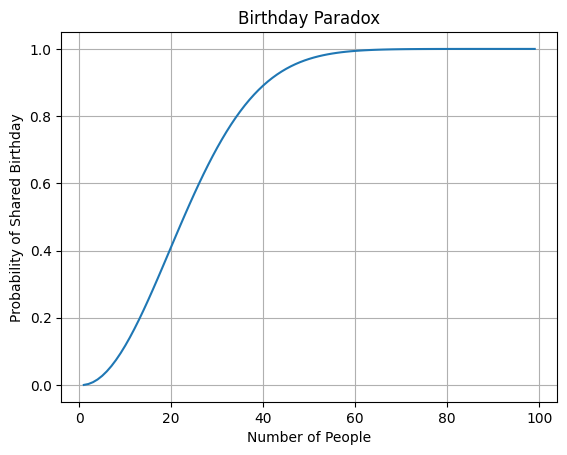

In [ ]:
import math
import matplotlib.pyplot as plt

def calculate(n):
    prob = 1.0
    for i in range(n):
        prob *= (365 - i) / 365
    return 1 - prob

def plot_birthday_paradox():
    x_coordinates = []
    y_coordinates = []

    for i in range(1, 100):
        x = i
        y = calculate(i)
        x_coordinates.append(x)
        y_coordinates.append(y)

    plt.plot(x_coordinates, y_coordinates)
    plt.xlabel('Number of People')
    plt.ylabel('Probability of Shared Birthday')
    plt.title('Birthday Paradox')
    plt.grid(True)
    plt.show()


plot_birthday_paradox()
